In [1]:
#Doesn't seem to work here properly

import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings(action='once')

In [2]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [3]:
import findspark

In [4]:
findspark.init('/home/vishakan/spark-3.2.1-bin-hadoop3.2')

In [5]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [6]:
#Run this only once, restart kernel if errors
sc = SparkContext()

22/03/28 00:39:00 WARN Utils: Your hostname, Legion resolves to a loopback address: 127.0.1.1; using 192.168.1.3 instead (on interface wlp7s0)
22/03/28 00:39:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/28 00:39:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
ssc = StreamingContext(sc, 10)
sqlContext = SQLContext(sc)

/home/vishakan/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [8]:
#TwitterStream.py Socket 
socket_stream = ssc.socketTextStream("127.0.0.1", 9999)

In [9]:
lines = socket_stream.window(20)

In [10]:
from collections import namedtuple
fields = ("tag", "count")
Tweet = namedtuple("Tweet", fields)

In [11]:
#Parantheses for multiple lines
(lines.flatMap(lambda text: text.split(" ")) #Splits to words
 .filter(lambda word: word.lower().startswith("#")) #Get #tags
 .map(lambda word: (word.lower(), 1)) #Tuple of #tag and count
 .reduceByKey(lambda a, b: a + b) #Add up the counts
 .map(lambda record: Tweet(record[0], record[1])) #Tweet class
 .foreachRDD(lambda rdd: rdd.toDF().sort(desc("count")) #Sort by count desc
 .limit(10).registerTempTable("tweets")) #Register to temp SQL Table
) #For every 10 tweets create a dataframe of hashtag frequencies

### Run TwitterStream.py

In [12]:
ssc.start()

In [13]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

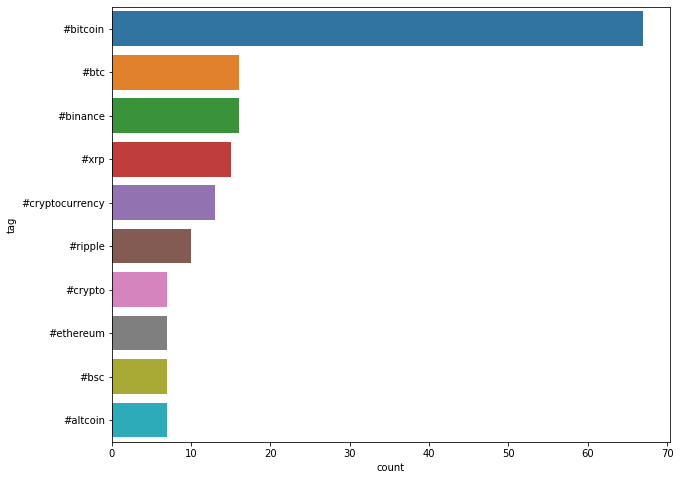

In [15]:
time.sleep(10) #in case tweets table hasn't been created yet

count = 0

while count < 10:
    time.sleep(5)
    top_10_tweets = sqlContext.sql("Select tag, count from tweets")
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure(figsize=(10, 8))
    sns.barplot(x="count", y="tag", data=top_10_df)
    plt.show()
    count += 1

In [16]:
ssc.stop()

22/03/28 00:48:40 WARN SocketReceiver: Error receiving data
java.net.SocketException: Socket closed
	at java.base/java.net.SocketInputStream.socketRead0(Native Method)
	at java.base/java.net.SocketInputStream.socketRead(SocketInputStream.java:115)
	at java.base/java.net.SocketInputStream.read(SocketInputStream.java:168)
	at java.base/java.net.SocketInputStream.read(SocketInputStream.java:140)
	at java.base/sun.nio.cs.StreamDecoder.readBytes(StreamDecoder.java:284)
	at java.base/sun.nio.cs.StreamDecoder.implRead(StreamDecoder.java:326)
	at java.base/sun.nio.cs.StreamDecoder.read(StreamDecoder.java:178)
	at java.base/java.io.InputStreamReader.read(InputStreamReader.java:181)
	at java.base/java.io.BufferedReader.fill(BufferedReader.java:161)
	at java.base/java.io.BufferedReader.readLine(BufferedReader.java:326)
	at java.base/java.io.BufferedReader.readLine(BufferedReader.java:392)
	at org.apache.spark.streaming.dstream.SocketReceiver$$anon$2.getNext(SocketInputDStream.scala:121)
	at org.a